In [10]:
# Import necessary libraries;
import numpy as np
from numpy import mean
from numpy import std


import pandas as pd

import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set_style('white')

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


from mpl_toolkits.mplot3d import Axes3D
from numpy import genfromtxt
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.datasets import load_digits, make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler 
from sklearn.preprocessing import RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn import tree
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
encodeLabel = LabelEncoder()

In [11]:
gammaData = pd.read_csv('telescope_data.csv')
del gammaData['Unnamed: 0']
gammaData.head()

X = gammaData.iloc[:,0:9].values
y = gammaData.iloc[:,10].values
gammaData.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

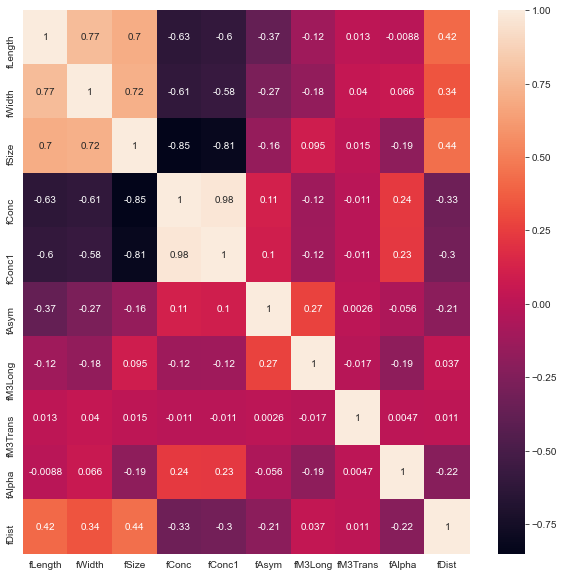

In [21]:
corrMatrix = gammaData.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corrMatrix, annot=True)


plt.show()

In [12]:
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = encodeLabel.fit_transform(gammaData['class']),
                   colorscale = 'Rainbow',
                   cauto = True),
             dimensions = list([
             dict(range = [gammaData['fLength'].min() ,gammaData['fLength'].max()],
                 label = "fLength", values = gammaData['fLength']),
             dict(range = [gammaData['fWidth'].min() ,gammaData['fWidth'].max()],
                 label = 'fWidth', values = gammaData['fWidth']),
             dict(range = [gammaData['fSize'].min() ,gammaData['fSize'].max()],
                 label = 'fSize', values = gammaData['fSize']),
             dict(range = [gammaData['fConc'].min() ,gammaData['fConc'].max()],
                 label = 'fConc', values = gammaData['fConc']),
             dict(range = [gammaData['fConc1'].min() ,gammaData['fConc1'].max()],
                 label = 'fConc1', values = gammaData['fConc1']),
             dict(range = [gammaData['fAsym'].min() ,gammaData['fAsym'].max()],
                 label = 'fAsym', values = gammaData['fAsym']),
             dict(range = [gammaData['fM3Long'].min() ,gammaData['fM3Long'].max()],
                 label = 'fM3Long', values = gammaData['fM3Long']),
             dict(range = [gammaData['fM3Trans'].min() ,gammaData['fM3Trans'].max()],
                 label = 'fM3Trans', values = gammaData['fM3Trans']),
             dict(range = [gammaData['fAlpha'].min() ,gammaData['fAlpha'].max()],
                 label = 'fAlpha', values = gammaData['fAlpha']),
             dict(range = [gammaData['fDist'].min() ,gammaData['fDist'].max()],
                 label = 'fDist', values = gammaData['fDist'])])
    )
)
               
fig.show()

In [3]:
gammaData['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder
encodeLabel = LabelEncoder()
y = encodeLabel.fit_transform(y)
#To be used for validation purposes with best model for each trial 5000 train and 45000 test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.75, random_state=1738)


# LOGISTIC REGRESSION TRIAL ONE ON GAMMA PARTICLES DATASET

In [84]:
import warnings
warnings.filterwarnings('ignore')

ITERATIONS = 1
for i in range(1):
    #For reach "trial", randomly select 5000 data points
    random5000DataPoints = gammaData.sample(n = 5000, replace = True)
    #From that 5000, create x set and y set
    xSet = random5000DataPoints.iloc[:,0:9].values
    ySet = random5000DataPoints.iloc[:,10].values
    ySet = encodeLabel.fit_transform(ySet)
    
    pipe = Pipeline([('std', StandardScaler()),('classifier', LogisticRegression(n_jobs = -1))])

    search_space = [
                {
                 
                 'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                
                {
                 
                 'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                
                {
                
                'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                'classifier__solver': ['lbfgs','saga','newton-cg','liblinear'],
                'classifier__penalty': ['none']},
        
                {
                 
                 'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                 'classifier__solver': ['newton-cg'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                
                {
                 'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                 'classifier__solver': ['liblinear'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)}
                
                ]
    
    runHyperParamSearch = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5), 
                          scoring=['recall_micro', 'f1_micro','precision_micro','roc_auc_ovo','jaccard','neg_log_loss'], 
                          refit=False, verbose=10, n_jobs = -1)
    TRIAL_1 = runHyperParamSearch.fit(xSet, ySet)
    print("---------------------------------TRIAL ONE RESULTS ---------------------------------------------")

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1950s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1646s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 189 out of 245 | elapsed:    3.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 214 out of 245 | elapsed:   

---------------------------------TRIAL ONE RESULTS ---------------------------------------------


In [85]:
TRIAL_1.cv_results_

{'mean_fit_time': array([0.02451997, 0.0366312 , 0.0289237 , 0.04253583, 0.03622761,
        0.03182716, 0.04313679, 0.04333711, 0.07726598, 0.07456446,
        0.08006935, 0.07416396, 0.08207059, 0.06585603, 0.094982  ,
        0.07576537, 0.0933804 , 0.0812706 , 0.0364316 , 0.02472148,
        0.03533106, 0.03473043, 0.0364316 , 0.04163575, 0.04183574,
        0.0365315 , 0.03733139, 0.03843312, 0.08126884, 0.05134516,
        0.00350327, 0.04436331, 0.04954271, 0.06285391, 0.06065178,
        0.06405506, 0.05494695, 0.06165318, 0.06565666, 0.05254521,
        0.01100988, 0.0133121 , 0.01671457, 0.01811528, 0.01461325,
        0.01521287, 0.01581292, 0.01591396, 0.0155127 ]),
 'std_fit_time': array([0.00170451, 0.00198625, 0.00404581, 0.00300277, 0.00242413,
        0.00326746, 0.02117122, 0.00435823, 0.0056492 , 0.01623739,
        0.00392726, 0.00950742, 0.01991996, 0.00849587, 0.00673205,
        0.01455377, 0.01287794, 0.01154522, 0.00800318, 0.00150445,
        0.0029278 , 0.004

In [86]:
print("---------------------------------TRIAL ONE NEG LOG LOSS RESULTS ---------------------------------------------")
TRIAL_1.cv_results_['rank_test_neg_log_loss']
TRIAL_1.cv_results_['params'][ np.argmin(TRIAL_1.cv_results_['rank_test_neg_log_loss']) ]

---------------------------------TRIAL ONE NEG LOG LOSS RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [87]:
print("---------------------------------TRIAL ONE F1 RESULTS ---------------------------------------------")
TRIAL_1.cv_results_['rank_test_f1_micro']
TRIAL_1.cv_results_['params'][ np.argmin(TRIAL_1.cv_results_['rank_test_f1_micro']) ]

---------------------------------TRIAL ONE F1 RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [88]:
print("---------------------------------TRIAL ONE ROC AUC RESULTS ---------------------------------------------")
TRIAL_1.cv_results_['rank_test_roc_auc_ovo']
TRIAL_1.cv_results_['params'][ np.argmin(TRIAL_1.cv_results_['rank_test_roc_auc_ovo']) ]

---------------------------------TRIAL ONE ROC AUC RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 0.1,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga'}

In [89]:
print("---------------------------------TRIAL ONE JACCARD SCORE RESULTS ---------------------------------------------")
TRIAL_1.cv_results_['rank_test_jaccard']
TRIAL_1.cv_results_['params'][ np.argmin(TRIAL_1.cv_results_['rank_test_jaccard']) ]

---------------------------------TRIAL ONE JACCARD SCORE RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [109]:



print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best NEG LOG LOSS results to train on test set, 
bestF1LR233 = TRIAL_1.cv_results_['params'][ np.argmin(TRIAL_1.cv_results_['rank_test_neg_log_loss']) ]
pipe.set_params(**p)
pipe.fit(X_train,y_train)
y_pred_train__neg_log_loss = pipe.predict(X_train)
y_pred_test_neg_log_loss = pipe.predict(X_test)
print('Accuracy of Trial 1 Logistic Regression using best NEG LOG LOSS hyperparameters :'
      + str(accuracy_score(y_test,y_pred_test_neg_log_loss)))
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best F1 results to train on test set, LR_Trial 1
bestF1LR1 = TRIAL_1.cv_results_['params'][ np.argmin(TRIAL_1.cv_results_['rank_test_f1_micro']) ]
pipe.set_params(**p)
pipe.fit(X_train,y_train)
y_pred_train_roc_auc = pipe.predict(X_train)
y_pred_test_f1 = pipe.predict(X_test)
print('Accuracy of Trial 1 Logistic Regression using best F1 hyperparameters :'
      + str(accuracy_score(y_test,y_pred_test_f1)))
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best ROC_AUC results to train on test set, LR_Trial 1
p  = TRIAL_1.cv_results_['params'][ np.argmin(TRIAL_1.cv_results_['rank_test_roc_auc_ovo']) ]
pipe.set_params(**p)
pipe.fit(X_train,y_train)
y_pred_train_roc_auc = pipe.predict(X_train)
y_pred_test_roc_auc = pipe.predict(X_test)
print('Accuracy of Trial 1 Logistic Regression using best ROC_AUC hyperparameters :'
      + str(accuracy_score(y_test,y_pred_test_roc_auc)))
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best JACCARD results to train on test set, LR_Trial 1
p = TRIAL_1.cv_results_['params'][ np.argmin(TRIAL_1.cv_results_['rank_test_jaccard']) ]
pipe.set_params(**p)
pipe.fit(X_train,y_train)
y_pred_train_roc_auc = pipe.predict(X_train)
y_pred_test_jaccard = pipe.predict(X_test)
print('Accuracy of Trial 1 Logistic Regression using best JACCARD hyperparameters :'
      + str(accuracy_score(y_test,y_pred_test_jaccard)))
print("------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------
Accuracy of Trial 1 Logistic Regression using best NEG LOG LOSS hyperparameters :0.7898352611286366
------------------------------------------------------------------------------------------------
Accuracy of Trial 1 Logistic Regression using best F1 hyperparameters :0.7898352611286366
------------------------------------------------------------------------------------------------
Accuracy of Trial 1 Logistic Regression using best ROC_AUC hyperparameters :0.7898352611286366
------------------------------------------------------------------------------------------------
Accuracy of Trial 1 Logistic Regression using best JACCARD hyperparameters :0.7903960743077463
------------------------------------------------------------------------------------------------


# LOGISTIC REGRESSION TRIAL TWO ON GAMMA PARTICLES DATASET

In [19]:
ITERATIONS = 1
for i in range(1):
    #For reach "trial", randomly select 5000 data points
    random5000DataPoints = gammaData.sample(n = 5000, replace = True)
    #From that 5000, create x set and y set
    xSet = random5000DataPoints.iloc[:,0:9].values
    ySet = random5000DataPoints.iloc[:,10].values
    ySet = encodeLabel.fit_transform(ySet)
    
    pipe = Pipeline([('std', StandardScaler()),('classifier', LogisticRegression(n_jobs = -1))])

    search_space = [
                {
                 
                 'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                
                {
                 
                 'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                
                {
                
                'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                'classifier__solver': ['lbfgs','saga','newton-cg','liblinear'],
                'classifier__penalty': ['none']},
        
                {
                 
                 'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                 'classifier__solver': ['newton-cg'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                
                {
                 'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                 'classifier__solver': ['liblinear'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)}
                
                ]
    
    runHyperParamSearch = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5), 
                          scoring=['recall_micro', 'f1_micro','precision_micro','roc_auc_ovo','jaccard','neg_log_loss'], 
                          refit=False, verbose=10, n_jobs = -1)
    TRIAL_2 = runHyperParamSearch.fit(xSet, ySet)
    print("---------------------------------TRIAL TWO RESULTS ---------------------------------------------")

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0350s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0961s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    0.6s


---------------------------------TRIAL TWO RESULTS ---------------------------------------------


[Parallel(n_jobs=-1)]: Done 214 out of 245 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    0.7s finished


In [20]:
TRIAL_2.cv_results_

{'mean_fit_time': array([0.01261134, 0.02662239, 0.0190155 , 0.02362013, 0.02692327,
        0.0262219 , 0.03132677, 0.04684   , 0.07766657, 0.06345415,
        0.0781672 , 0.06435552, 0.07996883, 0.06765862, 0.08437295,
        0.06885934, 0.08557434, 0.06685796, 0.01751542, 0.0170146 ,
        0.01961713, 0.02352033, 0.02552252, 0.02932549, 0.03002586,
        0.02602215, 0.02672343, 0.03182778, 0.07907977, 0.03963351,
        0.00300283, 0.0319272 , 0.03172755, 0.03843331, 0.04433866,
        0.04473906, 0.04193625, 0.04243608, 0.04003477, 0.03863306,
        0.00900869, 0.00960813, 0.01150937, 0.01511259, 0.01321168,
        0.01641402, 0.01311169, 0.01176605, 0.01090875]),
 'std_fit_time': array([0.00086094, 0.0012015 , 0.00070837, 0.00111429, 0.0015311 ,
        0.00129006, 0.00360323, 0.00480665, 0.00581348, 0.00389453,
        0.0026745 , 0.00188843, 0.00670925, 0.0043557 , 0.00309476,
        0.00314279, 0.00456475, 0.00277002, 0.00070786, 0.00212307,
        0.00276597, 0.003

In [21]:
print("---------------------------------TRIAL TWO NEG LOG LOSS RESULTS ---------------------------------------------")
TRIAL_2.cv_results_['rank_test_neg_log_loss']
TRIAL_2.cv_results_['params'][ np.argmin(TRIAL_2.cv_results_['rank_test_neg_log_loss']) ]

---------------------------------TRIAL TWO NEG LOG LOSS RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 1.0,
 'classifier__penalty': 'l2',
 'classifier__solver': 'lbfgs'}

In [22]:
print("---------------------------------TRIAL TWO F1 RESULTS ---------------------------------------------")
TRIAL_2.cv_results_['rank_test_f1_micro']
TRIAL_2.cv_results_['params'][ np.argmin(TRIAL_2.cv_results_['rank_test_f1_micro']) ]

---------------------------------TRIAL TWO F1 RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 0.1,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

In [23]:
print("---------------------------------TRIAL TWO ROC AUC RESULTS ---------------------------------------------")
TRIAL_2.cv_results_['rank_test_roc_auc_ovo']
TRIAL_2.cv_results_['params'][ np.argmin(TRIAL_2.cv_results_['rank_test_roc_auc_ovo']) ]

---------------------------------TRIAL TWO ROC AUC RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 0.1,
 'classifier__penalty': 'l2',
 'classifier__solver': 'lbfgs'}

In [24]:
print("---------------------------------TRIAL TWO JACCARD SCORE RESULTS ---------------------------------------------")
TRIAL_2.cv_results_['rank_test_jaccard']
TRIAL_2.cv_results_['params'][ np.argmin(TRIAL_2.cv_results_['rank_test_jaccard']) ]

---------------------------------TRIAL TWO JACCARD SCORE RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 10.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [27]:
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best NEG LOG LOSS results to train on test set, 
bestF1LR23 = LogisticRegression(C = 1.0, penalty = 'l2', solver = 'lbfgs', n_jobs = -1)
bestF1LR23.fit(X_train,y_train)
y_pred3_23 = bestF1LR23.predict(X_test)
print('Accuracy of Trial 2 Logistic Regression using best NEG LOG LOSS hyperperameters :'
      + str(accuracy_score(y_test,y_pred3_23)))
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best F1 results to train on test set, 
bestF1LR2 = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'liblinear', n_jobs = -1)
bestF1LR2.fit(X_train,y_train)
y_pred3_2 = bestF1LR2.predict(X_test)
print('Accuracy of Trial 2 Logistic Regression using best F1 hyperperameters :'
      + str(accuracy_score(y_test,y_pred3_2)))
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best ROC_AUC results to train on test set, 
bestROCAUCLR2 = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'lbfgs', n_jobs = -1)
bestROCAUCLR2.fit(X_train,y_train)
y_pred4_2 = bestROCAUCLR2.predict(X_test)
print('Accuracy of Trial 2 Logistic Regression using best ROC_AUC hyperperameters :'
      + str(accuracy_score(y_test,y_pred4_2)))
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best JACCARD results to train on test set, 
bestJACCARDLR2 = LogisticRegression(C = 10.0, penalty = 'l1', solver = 'saga', n_jobs = -1)
bestJACCARDLR2.fit(X_train,y_train)
y_pred5_2 = bestJACCARDLR2.predict(X_test)
print('Accuracy of Trial 2 Logistic Regression using best JACCARD hyperperameters :'
      + str(accuracy_score(y_test,y_pred5_2)))
print("------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------
Accuracy of Trial 2 Logistic Regression using best NEG LOG LOSS hyperperameters :0.79018576936558
------------------------------------------------------------------------------------------------
Accuracy of Trial 2 Logistic Regression using best F1 hyperperameters :0.7852085524009814
------------------------------------------------------------------------------------------------
Accuracy of Trial 2 Logistic Regression using best ROC_AUC hyperperameters :0.788994041359972
------------------------------------------------------------------------------------------------
Accuracy of Trial 2 Logistic Regression using best JACCARD hyperperameters :0.7660007010164739
------------------------------------------------------------------------------------------------


# LOGISTIC REGRESSION TRIAL THREE ON GAMMA PARTICLES DATASET

In [28]:
ITERATIONS = 1
for i in range(1):
    #For reach "trial", randomly select 5000 data points
    random5000DataPoints = gammaData.sample(n = 5000, replace = True)
    #From that 5000, create x set and y set
    xSet = random5000DataPoints.iloc[:,0:9].values
    ySet = random5000DataPoints.iloc[:,10].values
    ySet = encodeLabel.fit_transform(ySet)
    
    pipe = Pipeline([('std', StandardScaler()),('classifier', LogisticRegression(n_jobs = -1))])

    search_space = [
                {
                 
                 'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                
                {
                 
                 'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                
                {
                
                'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                'classifier__solver': ['lbfgs','saga','newton-cg','liblinear'],
                'classifier__penalty': ['none']},
        
                {
                 
                 'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                 'classifier__solver': ['newton-cg'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                
                {
                 'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                 'classifier__solver': ['liblinear'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)}
                
                ]
    
    runHyperParamSearch = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5), 
                          scoring=['recall_micro', 'f1_micro','precision_micro','roc_auc_ovo','jaccard','neg_log_loss'], 
                          refit=False, verbose=10, n_jobs = -1)
    TRIAL_3 = runHyperParamSearch.fit(xSet, ySet)
    print("---------------------------------TRIAL THREE RESULTS ---------------------------------------------")

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0365s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1291s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    0.6s


---------------------------------TRIAL THREE RESULTS ---------------------------------------------


[Parallel(n_jobs=-1)]: Done 189 out of 245 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    0.7s finished


In [29]:
TRIAL_3.cv_results_

{'mean_fit_time': array([0.01371236, 0.0275239 , 0.01721425, 0.02452102, 0.02652292,
        0.02472034, 0.03723192, 0.03933392, 0.0499424 , 0.05825009,
        0.06243682, 0.05664983, 0.06735768, 0.06335459, 0.0818707 ,
        0.05704904, 0.07386336, 0.06155286, 0.01811595, 0.01981702,
        0.02211924, 0.02572203, 0.02872534, 0.02772422, 0.03042655,
        0.02882533, 0.03152742, 0.02982564, 0.06755815, 0.04083524,
        0.00320306, 0.03222733, 0.03372893, 0.0351295 , 0.03933306,
        0.04263639, 0.03963389, 0.04173589, 0.04143529, 0.04103498,
        0.0097086 , 0.00990911, 0.01151066, 0.01341095, 0.01371202,
        0.01341186, 0.01221132, 0.01221232, 0.01080856]),
 'std_fit_time': array([0.00103044, 0.00122551, 0.00143611, 0.00083725, 0.00151783,
        0.00067894, 0.00935494, 0.00238162, 0.01214893, 0.00409777,
        0.00927996, 0.00421574, 0.01151913, 0.00495021, 0.00706707,
        0.0049741 , 0.00804765, 0.00603855, 0.00442375, 0.00208961,
        0.00285566, 0.001

In [30]:
print("---------------------------------TRIAL THREE NEG LOG LOSS RESULTS ---------------------------------------------")
TRIAL_3.cv_results_['rank_test_neg_log_loss']
TRIAL_3.cv_results_['params'][ np.argmin(TRIAL_3.cv_results_['rank_test_neg_log_loss']) ]

---------------------------------TRIAL THREE NEG LOG LOSS RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [31]:
print("---------------------------------TRIAL THREE F1 RESULTS ---------------------------------------------")
TRIAL_3.cv_results_['rank_test_f1_micro']
TRIAL_3.cv_results_['params'][ np.argmin(TRIAL_3.cv_results_['rank_test_f1_micro']) ]

---------------------------------TRIAL THREE F1 RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 0.1,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

In [32]:
print("---------------------------------TRIAL THREE ROC AUC RESULTS ---------------------------------------------")
TRIAL_3.cv_results_['rank_test_roc_auc_ovo']
TRIAL_3.cv_results_['params'][ np.argmin(TRIAL_3.cv_results_['rank_test_roc_auc_ovo']) ]

---------------------------------TRIAL THREE ROC AUC RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 0.1,
 'classifier__penalty': 'l2',
 'classifier__solver': 'newton-cg'}

In [33]:
print("---------------------------------TRIAL THREE JACCARD SCORE RESULTS ---------------------------------------------")
TRIAL_3.cv_results_['rank_test_jaccard']
TRIAL_3.cv_results_['params'][ np.argmin(TRIAL_3.cv_results_['rank_test_jaccard']) ]

---------------------------------TRIAL THREE JACCARD SCORE RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 0.1,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

In [34]:
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best NEG LOG LOSS results to train on test set, 
bestF1LR23334 = LogisticRegression(C = 1.0, penalty = 'l1', solver = 'saga', n_jobs = -1)
bestF1LR23334.fit(X_train,y_train)
y_pred3_2343 = bestF1LR23334.predict(X_test)
print('Accuracy of Trial 3 Logistic Regression using best NEG LOG LOSS hyperparameters :'
      + str(accuracy_score(y_test,y_pred3_2343)))
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best F1 results to train on test set, LR_Trial 3
bestF1LR3 = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'liblinear', n_jobs = -1)
bestF1LR3.fit(X_train,y_train)
y_pred3_3 = bestF1LR3.predict(X_test)
print('Accuracy of Trial 3 Logistic Regression using best F1 hyperparameters :'
      + str(accuracy_score(y_test,y_pred3_3)))
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best ROC_AUC results to train on test set, LR_Trial 3
bestROCAUCLR3 = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'newton-cg', n_jobs = -1)
bestROCAUCLR3.fit(X_train,y_train)
y_pred4_3 = bestROCAUCLR3.predict(X_test)
print('Accuracy of Trial 3 Logistic Regression using best ROC_AUC hyparperameters :'
      + str(accuracy_score(y_test,y_pred4_3)))
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best JACCARD results to train on test set, LR_Trial 3
bestJACCARDLR3 = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'liblinear', n_jobs = -1)
bestJACCARDLR3.fit(X_train,y_train)
y_pred5_3 = bestJACCARDLR3.predict(X_test)
print('Accuracy of Trial 3 Logistic Regression using best JACCARD hyparperameters :'
      + str(accuracy_score(y_test,y_pred5_3)))
print("------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------
Accuracy of Trial 3 Logistic Regression using best NEG LOG LOSS hyperparameters :0.7661409043112514
------------------------------------------------------------------------------------------------
Accuracy of Trial 3 Logistic Regression using best F1 hyperparameters :0.7852085524009814
------------------------------------------------------------------------------------------------
Accuracy of Trial 3 Logistic Regression using best ROC_AUC hyparperameters :0.7895548545390817
------------------------------------------------------------------------------------------------
Accuracy of Trial 3 Logistic Regression using best JACCARD hyparperameters :0.7852085524009814
------------------------------------------------------------------------------------------------


# LOGISTIC REGRESSION TRIAL FOUR ON GAMMA PARTICLES DATASET

In [53]:
ITERATIONS = 1
for i in range(1):
    #For reach "trial", randomly select 5000 data points
    random5000DataPoints = gammaData.sample(n = 5000, replace = True, random_state = 777)
    #From that 5000, create x set and y set
    xSet = random5000DataPoints.iloc[:,0:9].values
    ySet = random5000DataPoints.iloc[:,10].values
    ySet = encodeLabel.fit_transform(ySet)
    
    pipe = Pipeline([('std', StandardScaler()),('classifier', LogisticRegression(n_jobs = -1))])

    search_space = [
                {
                 
                 'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                
                {
                 
                 'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                
                {
                
                'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                'classifier__solver': ['lbfgs','saga','newton-cg','liblinear'],
                'classifier__penalty': ['none']},
        
                {
                 
                 'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                 'classifier__solver': ['newton-cg'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                
                {
                 'classifier': [LogisticRegression(max_iter=7000,n_jobs = -1)],
                 'classifier__solver': ['liblinear'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)}
                
                ]
    
    runHyperParamSearch = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5), 
                          scoring=['recall_micro', 'f1_micro','precision_micro','roc_auc_ovo','jaccard','neg_log_loss'], 
                          refit=False, verbose=10, n_jobs = -1)
    TRIAL_4 = runHyperParamSearch.fit(xSet, ySet)
    print("---------------------------------TRIAL FOUR RESULTS ---------------------------------------------")

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0365s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0966s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    0.6s


---------------------------------TRIAL FOUR RESULTS ---------------------------------------------


[Parallel(n_jobs=-1)]: Done 189 out of 245 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    0.7s finished


In [54]:
TRIAL_4.cv_results_

{'mean_fit_time': array([0.01241078, 0.02882428, 0.0184155 , 0.02241907, 0.02552228,
        0.02492108, 0.02952571, 0.04704013, 0.0799684 , 0.07076068,
        0.08417215, 0.07026019, 0.09408083, 0.07176185, 0.09017782,
        0.07306275, 0.09388089, 0.07256231, 0.0191164 , 0.0193171 ,
        0.01961708, 0.02342062, 0.02652311, 0.0283246 , 0.0265234 ,
        0.03172765, 0.03362932, 0.03112683, 0.08517313, 0.04273658,
        0.00310268, 0.02862482, 0.0302259 , 0.03543067, 0.04553952,
        0.0422358 , 0.041536  , 0.0417357 , 0.04373765, 0.0391335 ,
        0.01050911, 0.00980887, 0.01150932, 0.01221018, 0.0118103 ,
        0.01361175, 0.01181002, 0.01140924, 0.00990829]),
 'std_fit_time': array([0.00037395, 0.00120913, 0.00096987, 0.00261697, 0.00141554,
        0.00185653, 0.00277726, 0.00316489, 0.00889811, 0.00347602,
        0.00767726, 0.00480609, 0.01443151, 0.00465829, 0.00818887,
        0.00497398, 0.01007165, 0.00523865, 0.00340006, 0.00469058,
        0.00222466, 0.003

In [55]:
print("---------------------------------TRIAL FOUR NEG LOG LOSS RESULTS ---------------------------------------------")
TRIAL_4.cv_results_['rank_test_neg_log_loss']
TRIAL_4.cv_results_['params'][ np.argmin(TRIAL_4.cv_results_['rank_test_neg_log_loss']) ]

---------------------------------TRIAL FOUR NEG LOG LOSS RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [56]:
print("---------------------------------TRIAL FOUR F1 RESULTS ---------------------------------------------")
TRIAL_4.cv_results_['rank_test_f1_micro']
TRIAL_4.cv_results_['params'][ np.argmin(TRIAL_4.cv_results_['rank_test_f1_micro']) ]

---------------------------------TRIAL FOUR F1 RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [57]:
print("---------------------------------TRIAL FOUR ROC AUC RESULTS ---------------------------------------------")
TRIAL_4.cv_results_['rank_test_roc_auc_ovo']
TRIAL_4.cv_results_['params'][ np.argmin(TRIAL_4.cv_results_['rank_test_roc_auc_ovo']) ]

---------------------------------TRIAL FOUR ROC AUC RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 0.1,
 'classifier__penalty': 'l2',
 'classifier__solver': 'newton-cg'}

In [58]:
print("---------------------------------TRIAL FOUR JACCARD SCORE RESULTS ---------------------------------------------")
TRIAL_4.cv_results_['rank_test_jaccard']
TRIAL_4.cv_results_['params'][ np.argmin(TRIAL_4.cv_results_['rank_test_jaccard']) ]

---------------------------------TRIAL FOUR JACCARD SCORE RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 10.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [61]:
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best NEG LOG LOSS results to train on test set, 
bestF1LR233334 = LogisticRegression(C = 1, penalty = 'l1', solver = 'saga', n_jobs = -1)
bestF1LR233334.fit(X_train,y_train)
y_pred3_23243 = bestF1LR233334.predict(X_test)
print('Accuracy of Trial 4 Logistic Regression using best NEG LOG LOSS hyperperameters :'
      + str(accuracy_score(y_test,y_pred3_23243)))
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best F1 results to train on test set, LR_Trial 4
bestF1LR4 = LogisticRegression(C = 0.01, penalty = 'l1', solver = 'saga', n_jobs = -1)
bestF1LR4.fit(X_train,y_train)
y_pred3_4 = bestF1LR4.predict(X_test)
print('Accuracy of Trial 4 Logistic Regression using best F1 hyperperameters :'
      + str(accuracy_score(y_test,y_pred3_4)))
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best ROC_AUC results to train on test set, LR_Trial 4
bestROCAUCLR4 = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'newton-cg', n_jobs = -1)
bestROCAUCLR4.fit(X_train,y_train)
y_pred4_4 = bestROCAUCLR4.predict(X_test)
print('Accuracy of Trial 4 Logistic Regression using best ROC_AUC hyperperameters :'
      + str(accuracy_score(y_test,y_pred4_4)))
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best JACCARD results to train on test set, LR_Trial 4
bestJACCARDLR4 = LogisticRegression(C = 10, penalty = 'l1', solver = 'saga', n_jobs = -1)
bestJACCARDLR4.fit(X_train,y_train)
y_pred5_4 = bestJACCARDLR4.predict(X_test)
print('Accuracy of Trial 4 Logistic Regression using best JACCARD hyperperameters :'
      + str(accuracy_score(y_test,y_pred5_4)))
print("------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------
Accuracy of Trial 4 Logistic Regression using best NEG LOG LOSS hyperperameters :0.7660007010164739
------------------------------------------------------------------------------------------------
Accuracy of Trial 4 Logistic Regression using best F1 hyperperameters :0.7631265334735367
------------------------------------------------------------------------------------------------
Accuracy of Trial 4 Logistic Regression using best ROC_AUC hyperperameters :0.7895548545390817
------------------------------------------------------------------------------------------------
Accuracy of Trial 4 Logistic Regression using best JACCARD hyperperameters :0.7660708026638626
------------------------------------------------------------------------------------------------


# LOGISTIC REGRESSION TRIAL FIVE ON GAMMA PARTICLES DATASET

In [76]:
ITERATIONS = 1
for i in range(1):
    #For reach "trial", randomly select 5000 data points
    random5000DataPoints = gammaData.sample(n = 5000, replace = True, random_state = 777)
    #From that 5000, create x set and y set
    xSet = random5000DataPoints.iloc[:,0:9].values
    ySet = random5000DataPoints.iloc[:,10].values
    ySet = encodeLabel.fit_transform(ySet)
    
    pipe = Pipeline([('std', StandardScaler()),('classifier', LogisticRegression(n_jobs = -1))])

    search_space = [
                {
                 
                 'classifier': [LogisticRegression(n_jobs = -1)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                
                {
                 
                 'classifier': [LogisticRegression(n_jobs = -1)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                
                {
                
                'classifier': [LogisticRegression(n_jobs = -1)],
                'classifier__solver': ['lbfgs','saga','newton-cg','liblinear'],
                'classifier__penalty': ['none']},
        
                {
                 
                 'classifier': [LogisticRegression(n_jobs = -1)],
                 'classifier__solver': ['newton-cg'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                
                {
                 'classifier': [LogisticRegression(n_jobs = -1)],
                 'classifier__solver': ['liblinear'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)}
                
                ]
    
    runHyperParamSearch = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5), 
                          scoring=['recall_micro', 'f1_micro','precision_micro','roc_auc_ovo','jaccard','neg_log_loss'], 
                          refit=False, verbose=10, n_jobs = -1)
    TRIAL_5 = runHyperParamSearch.fit(xSet, ySet)
    print("---------------------------------TRIAL FIVE RESULTS ---------------------------------------------")

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0350s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1341s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    0.5s


---------------------------------TRIAL FIVE RESULTS ---------------------------------------------


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 189 out of 245 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    0.8s finished


In [77]:
TRIAL_5.cv_results_

{'mean_fit_time': array([0.01331153, 0.02952461, 0.02171769, 0.03062625, 0.02872419,
        0.03172665, 0.04093537, 0.05284519, 0.08867593, 0.07346282,
        0.08757458, 0.08126955, 0.10088696, 0.07786703, 0.09388142,
        0.08257127, 0.10478988, 0.0787683 , 0.02732396, 0.02452116,
        0.02442088, 0.03292861, 0.03062601, 0.03332787, 0.03022618,
        0.03342867, 0.03302855, 0.03362851, 0.09167862, 0.04473863,
        0.00350289, 0.03523045, 0.03413   , 0.04083533, 0.04413853,
        0.04944224, 0.04523892, 0.04804153, 0.056148  , 0.04513888,
        0.01010923, 0.01091032, 0.01241293, 0.01471338, 0.0146122 ,
        0.01441445, 0.01411204, 0.01221113, 0.01120925]),
 'std_fit_time': array([0.00194031, 0.00316502, 0.00169281, 0.00508737, 0.00024538,
        0.00868946, 0.00870464, 0.00211365, 0.00670244, 0.00876217,
        0.00945814, 0.00947172, 0.0092417 , 0.00736531, 0.01032738,
        0.00773336, 0.01297843, 0.004637  , 0.00909953, 0.00487238,
        0.00292486, 0.003

In [78]:
print("---------------------------------TRIAL FIVE NEG LOG LOSS RESULTS ---------------------------------------------")
TRIAL_5.cv_results_['rank_test_neg_log_loss']
TRIAL_5.cv_results_['params'][ np.argmin(TRIAL_5.cv_results_['rank_test_neg_log_loss']) ]

---------------------------------TRIAL FIVE NEG LOG LOSS RESULTS ---------------------------------------------


{'classifier': LogisticRegression(n_jobs=-1),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [79]:
print("---------------------------------TRIAL FIVE F1 RESULTS ---------------------------------------------")
TRIAL_5.cv_results_['rank_test_f1_micro']
TRIAL_5.cv_results_['params'][ np.argmin(TRIAL_5.cv_results_['rank_test_f1_micro']) ]

---------------------------------TRIAL FIVE F1 RESULTS ---------------------------------------------


{'classifier': LogisticRegression(n_jobs=-1),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [80]:
print("---------------------------------TRIAL FIVE ROC AUC RESULTS ---------------------------------------------")
TRIAL_5.cv_results_['rank_test_roc_auc_ovo']
TRIAL_5.cv_results_['params'][ np.argmin(TRIAL_5.cv_results_['rank_test_roc_auc_ovo']) ]

---------------------------------TRIAL FIVE ROC AUC RESULTS ---------------------------------------------


{'classifier': LogisticRegression(n_jobs=-1),
 'classifier__C': 0.1,
 'classifier__penalty': 'l2',
 'classifier__solver': 'newton-cg'}

In [81]:
print("---------------------------------TRIAL FIVE JACCARD SCORE RESULTS ---------------------------------------------")
TRIAL_4.cv_results_['rank_test_jaccard']
TRIAL_4.cv_results_['params'][ np.argmin(TRIAL_4.cv_results_['rank_test_jaccard']) ]

---------------------------------TRIAL FIVE JACCARD SCORE RESULTS ---------------------------------------------


{'classifier': LogisticRegression(max_iter=7000, n_jobs=-1),
 'classifier__C': 10.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [82]:
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best NEG LOG LOSS results to train on test set, 
bestF1LR2333234 = LogisticRegression(C = 1.0, penalty = 'l2', solver = 'saga', n_jobs = -1)
bestF1LR2333234.fit(X_train,y_train)
y_pred3_232243 = bestF1LR2333234.predict(X_test)
print('Accuracy of Trial 5 Logistic Regression using best NEG LOG LOSS hyperperameters :'
      + str(accuracy_score(y_test,y_pred3_232243)))
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best F1 results to train on test set, LR_Trial 5
bestF1LR5 = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'saga', n_jobs = -1)
bestF1LR5.fit(X_train,y_train)
y_pred3_5 = bestF1LR5.predict(X_test)
print('Accuracy of Trial 5 Logistic Regression using best F1 hyperperameters :'
      + str(accuracy_score(y_test,y_pred3_5)))
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best ROC_AUC results to train on test set, LR_Trial 5
bestROCAUCLR5 = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'newton-cg', n_jobs = -1)
bestROCAUCLR5.fit(X_train,y_train)
y_pred4_5 = bestROCAUCLR5.predict(X_test)
print('Accuracy of Trial 5 Logistic Regression using best ROC_AUC hyperperameters :'
      + str(accuracy_score(y_test,y_pred4_5)))
print("------------------------------------------------------------------------------------------------")
# Using Best hyperparameters of best JACCARD results to train on test set, LR_Trial 5
bestJACCARDLR5 = LogisticRegression(C = 10.0, penalty = 'l1', solver = 'saga', n_jobs = -1)
bestJACCARDLR5.fit(X_train,y_train)
y_pred5_5 = bestJACCARDLR5.predict(X_test)
print('Accuracy of Trial 5 Logistic Regression using best JACCARD hyperperameters :'
      + str(accuracy_score(y_test,y_pred5_5)))
print("------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------
Accuracy of Trial 5 Logistic Regression using best NEG LOG LOSS hyperperameters :0.7660007010164739
------------------------------------------------------------------------------------------------
Accuracy of Trial 5 Logistic Regression using best F1 hyperperameters :0.7659305993690851
------------------------------------------------------------------------------------------------
Accuracy of Trial 5 Logistic Regression using best ROC_AUC hyperperameters :0.7895548545390817
------------------------------------------------------------------------------------------------
Accuracy of Trial 5 Logistic Regression using best JACCARD hyperperameters :0.7660007010164739
------------------------------------------------------------------------------------------------
